In [1]:
from __future__ import print_function
from __future__ import division

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context(rc={'figure.figsize': (14, 7) } )
figzize_me = figsize =(14, 7)
# import warnings; warnings.filterwarnings('ignore')


import os
import sys
sys.path.append(os.path.abspath('../'))
import abupy
# 本章不使用沙盒数据
abupy.env.disable_example_env_ipython()

only use pandas calc nd, please install talib!
disable example env


# 附录A 量化环境部署 

### A.2.1 数据模式的切换

In [2]:
from abupy import ABuSymbolPd
# 表A-1所示
ABuSymbolPd.make_kl_df('601398').tail()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2017-04-17,4.83,4.83,4.75,0.42,4.79,4.81,112989883,20170417,0,483,0.062314,0.065713
2017-04-18,4.79,4.81,4.77,-0.83,4.80,4.83,61091798,20170418,1,484,0.061251,0.063876
2017-04-19,4.74,4.79,4.73,-1.04,4.77,4.79,89715577,20170419,2,485,0.063096,0.066456
2017-04-20,4.73,4.77,4.72,-0.21,4.73,4.74,64197339,20170420,3,486,0.063425,0.066710
2017-04-21,4.81,4.83,4.72,1.69,4.73,4.73,125002644,20170421,4,487,0.065643,0.069802


In [5]:
from abupy import EMarketDataFetchMode, abu

# 强制使用本地缓存数据
abupy.env.g_data_fetch_mode = \
    EMarketDataFetchMode.E_DATA_FETCH_FORCE_LOCAL

from abupy import AbuFactorBuyBreak
from abupy import AbuFactorAtrNStop
from abupy import AbuFactorPreAtrNStop
from abupy import AbuFactorCloseAtrNStop

# 设置初始资金数
read_cash = 1000000
# 设置选股因子，None为不使用选股因子
stock_pickers = None
# 买入因子依然延用向上突破因子
buy_factors = [{'xd': 60, 'class': AbuFactorBuyBreak},
               {'xd': 42, 'class': AbuFactorBuyBreak}]
# 卖出因子继续使用上一章使用的因子
sell_factors = [
    {'stop_loss_n': 1.0, 'stop_win_n': 3.0,
     'class': AbuFactorAtrNStop},
    {'class': AbuFactorPreAtrNStop, 'pre_atr_n': 1.5},
    {'class': AbuFactorCloseAtrNStop, 'close_atr_n': 1.5}
]

In [7]:
# 择时股票池
choice_symbols = ['usNOAH', 'usSFUN', 'usBIDU', 'usAAPL', 'usGOOG', 'usTSLA', 'usWUBA', 'usVIPS']
# 使用run_loop_back运行策略
abupy.env.enable_example_env_ipython()
abu_result_tuple, _ = abu.run_loop_back(read_cash, 
                  buy_factors, sell_factors, stock_pickers, choice_symbols=choice_symbols, n_folds=2)
abupy.env.disable_example_env_ipython()

disable example env


买入后卖出的交易数量:67
胜率:55.2239%
平均获利期望:14.1076%
平均亏损期望:-7.7029%
盈亏比:2.3543
策略收益: 50.4448%
基准收益: 15.0841%
策略年化收益: 25.2224%
基准年化收益: 7.5420%
策略买入成交比例:80.0000%
策略资金利用率比例:27.2194%
策略共执行504个交易日


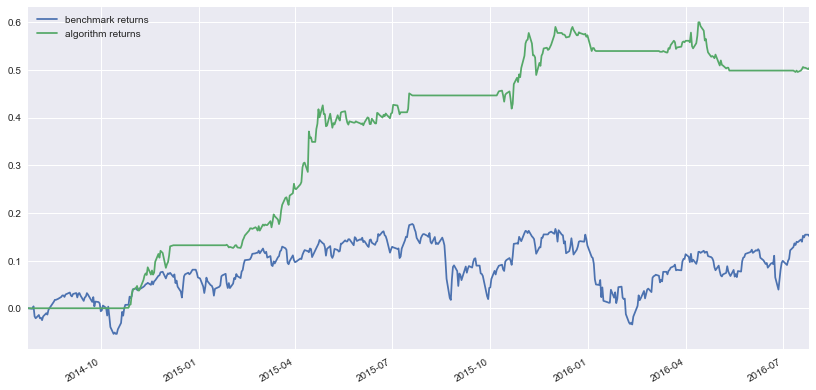

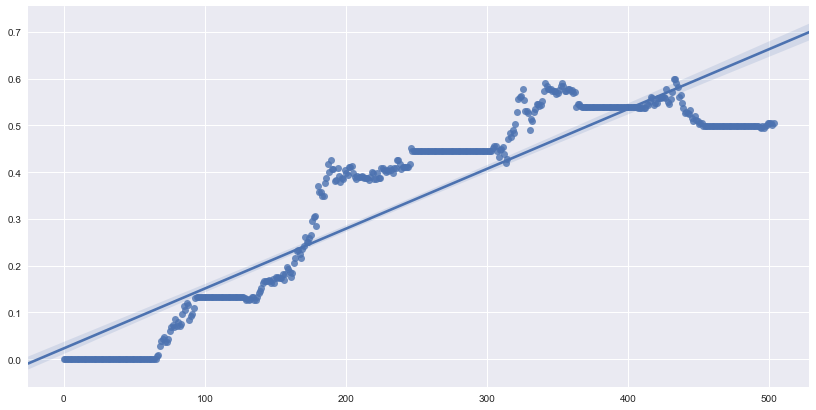

/Users/Bailey/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


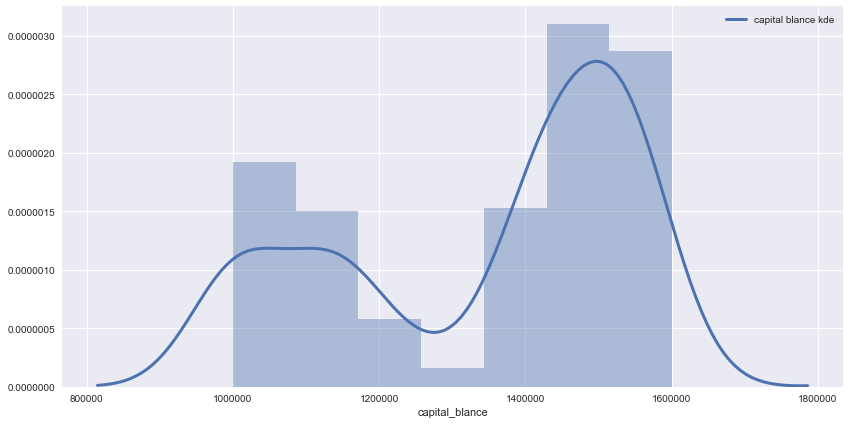

In [8]:
from abupy import AbuMetricsBase
metrics = AbuMetricsBase(*abu_result_tuple)
metrics.fit_metrics()
metrics.plot_returns_cmp()

In [9]:
from abupy import EMarketSourceType
abupy.env.g_market_source = EMarketSourceType.E_MARKET_SOURCE_tx

In [10]:
# 强制走网络数据源
abupy.env.g_data_fetch_mode = EMarketDataFetchMode.E_DATA_FETCH_FORCE_NET
# 择时股票池
choice_symbols = ['601398', '600028', '601857', '601318', '600036', '000002', '600050', '600030']
# 使用run_loop_back运行策略
abu_result_tuple, _ = abu.run_loop_back(read_cash, 
                  buy_factors, sell_factors, stock_pickers, choice_symbols=choice_symbols, n_folds=2)

pid:22894 gen kl_pd complete:100%
pid:22936 pick times complete:100%
pid:22938 pick times complete:100%
pid:22937 pick times complete:100%
pid:22939 pick times complete:100%
pid:22940 pick times complete:100%
pid:22941 pick times complete:100%
pid:22943 pick times complete:100%
pid:22942 pick times complete:100%


买入后卖出的交易数量:7
胜率:28.57%
平均获利期望:44.95%
平均亏损期望:-9.34%
盈亏比:3.8119
策略收益: 12.77%
基准收益: 17.83%
策略年化收益: 6.4%
基准年化收益: 8.93%
策略买入成交比例: 100.0%
策略资金利用率比例: 5.77%
策略共执行503个交易日


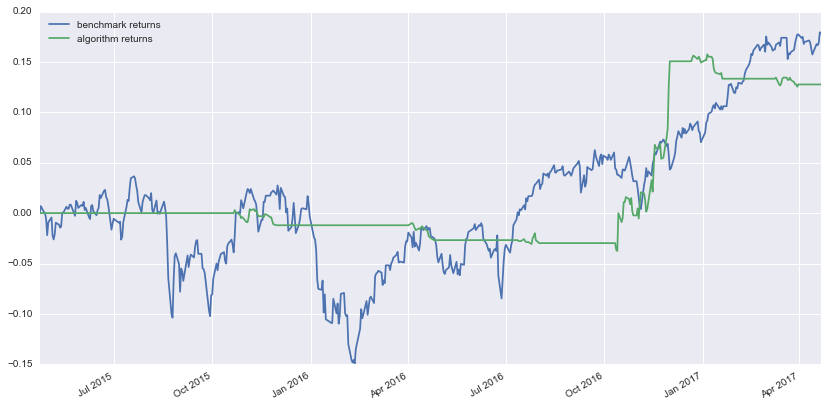

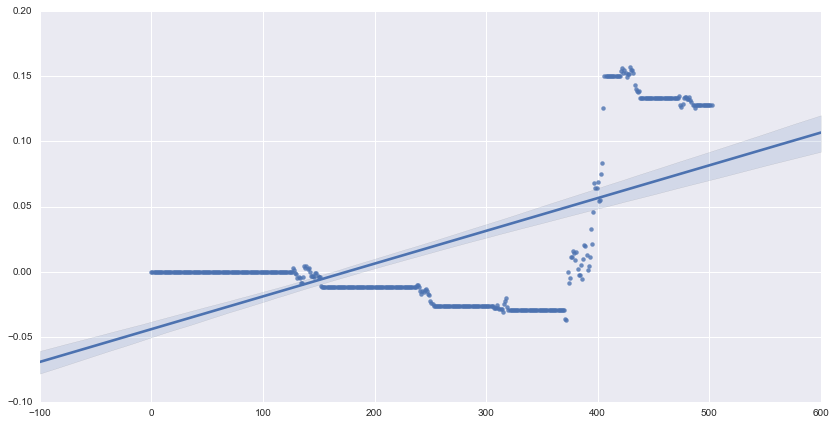

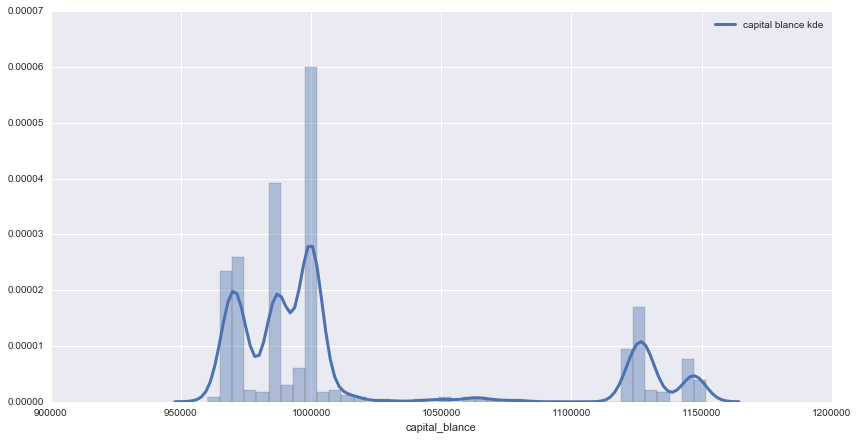

In [11]:
from abupy import AbuMetricsBase
metrics = AbuMetricsBase(*abu_result_tuple)
metrics.fit_metrics()
metrics.plot_returns_cmp()

### A.2.2 目标市场的切换
### A.2.3 A股市场的回测示例

In [2]:
from abupy import EMarketTargetType, abu
abupy.env.g_market_target = EMarketTargetType.E_MARKET_TARGET_CN

In [3]:
abu.run_kl_update(n_folds=6, n_jobs=32)

备注：同理美股市场预下载使用如下代码

In [4]:
from abupy import EMarketTargetType, abu
abupy.env.g_market_target = EMarketTargetType.E_MARKET_TARGET_US
abu.run_kl_update(n_folds=6, n_jobs=32)

## 耗时操作，运行一次后生成本地回测结果缓存，如果有缓存也可不运行回测，直接从本地缓存加载

In [6]:
abupy.env.g_market_target = EMarketTargetType.E_MARKET_TARGET_CN
# 初始化资金800万
read_cash = 8000000
# 每笔交易的买入基数资金设置为万分之15
abupy.beta.atr.g_atr_pos_base = 0.0015
# 使用run_loop_back运行策略，因子使用和之前一样，choice_symbols=None为全市场回测，5年历史数据回测
abu_result_tuple, _ = abu.run_loop_back(read_cash, 
                  buy_factors, sell_factors, stock_pickers, choice_symbols=None, n_folds=5)
from abupy import EStoreAbu
abu.store_abu_result_tuple(abu_result_tuple, n_folds=5, store_type=EStoreAbu.E_STORE_CUSTOM_NAME, custom_name='market_a_all_tx')

pid:25953 pick times complete:100%


## 直接从本地缓存加载

In [ ]:
from abupy import EStoreAbu
abu_result_tuple = abu.load_abu_result_tuple(n_folds=5, store_type=EStoreAbu.E_STORE_CUSTOM_NAME, custom_name='market_a_all_tx')

买入后卖出的交易数量:57436
胜率:47.18%
平均获利期望:14.76%
平均亏损期望:-8.13%
盈亏比:1.8707
策略收益: 101.74%
基准收益: 35.25%
策略年化收益: 20.35%
基准年化收益: 7.05%
策略买入成交比例: 46.77%
策略资金利用率比例: 72.7%
策略共执行1260个交易日
/Users/Bailey/anaconda2/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
/Users/Bailey/anaconda2/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/Bailey/anaconda2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


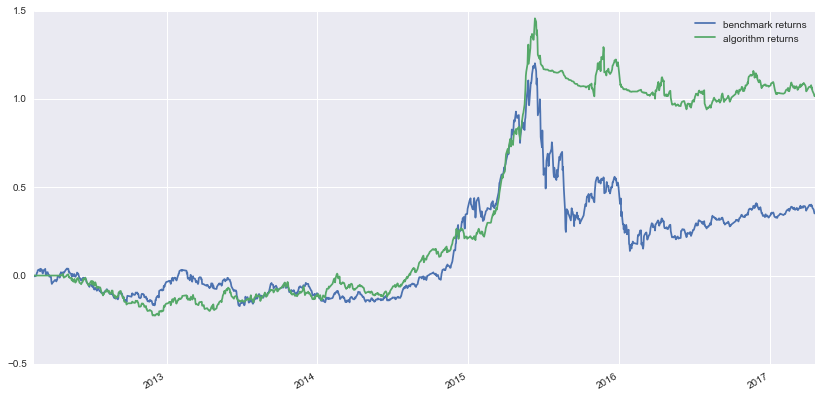

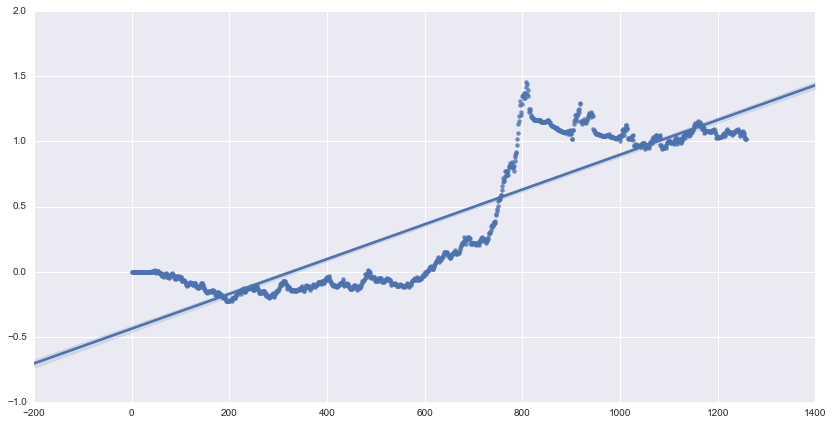

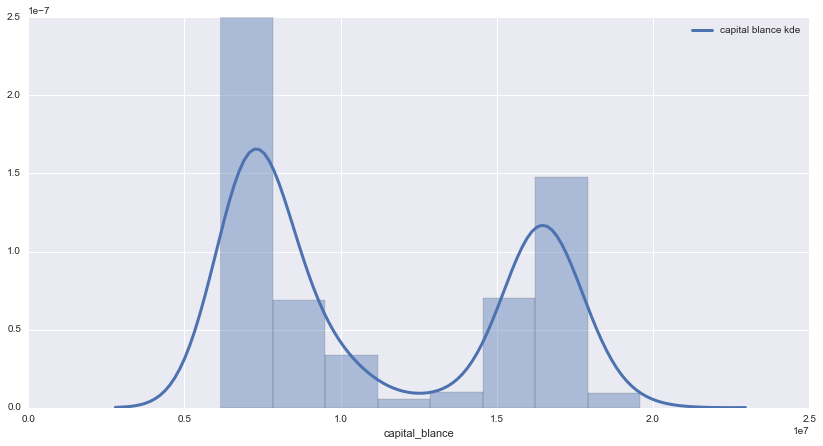

In [8]:
from abupy import AbuMetricsBase
metrics = AbuMetricsBase(*abu_result_tuple)
metrics.fit_metrics()
metrics.plot_returns_cmp()

### A.2.4 港股市场的回测示例

In [11]:
# 设置市场类型为港股
abupy.env.g_market_target = EMarketTargetType.E_MARKET_TARGET_HK

# 切换使用csv数据存贮模式, 将港股数据以csv的形式，存储
from abupy import EDataCacheType
abupy.env.g_data_cache_type = EDataCacheType.E_DATA_CACHE_CSV

# 在进行5年历史数据回测前，获取6年股股历史数据，这个会保存csv不是hdf5了
abu.run_kl_update(n_folds=6, n_jobs=32)

## 耗时操作，运行一次后生成本地回测结果缓存，如果有缓存也可不运行回测，直接从本地缓存加载

In [12]:
# 初始化资金800万
read_cash = 8000000
# 每笔交易的买入基数资金设置为万分之55, 这个值参考市场中的symbol数量
abupy.beta.atr.g_atr_pos_base = 0.0055
# 使用run_loop_back运行策略，因子使用和之前一样，choice_symbols=None为全市场回测，5年历史数据回测
abu_result_tuple_hk, _ = abu.run_loop_back(read_cash, 
                  buy_factors, sell_factors, stock_pickers, choice_symbols=None, n_folds=5)
from abupy import EStoreAbu
abu.store_abu_result_tuple(abu_result_tuple_hk, n_folds=5, store_type=EStoreAbu.E_STORE_CUSTOM_NAME, custom_name='market_hk_all_tx')

pid:28825 pick times complete:100%


## 直接从本地缓存加载

In [ ]:
from abupy import EStoreAbu
abu_result_tuple_hk = abu.load_abu_result_tuple(n_folds=5, store_type=EStoreAbu.E_STORE_CUSTOM_NAME, custom_name='market_hk_all_tx')

买入后卖出的交易数量:22305
胜率:44.95%
平均获利期望:15.84%
平均亏损期望:-7.86%
盈亏比:1.8245
策略收益: 135.32%
基准收益: 11.53%
策略年化收益: 27.06%
基准年化收益: 2.31%
策略买入成交比例: 45.33%
策略资金利用率比例: 79.19%
策略共执行1260个交易日


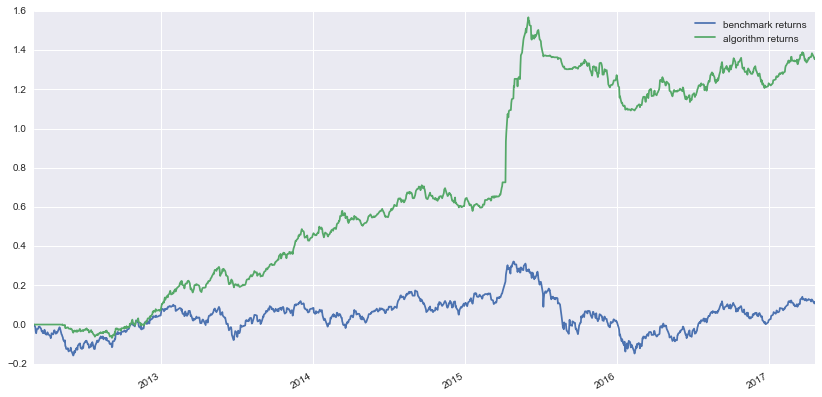

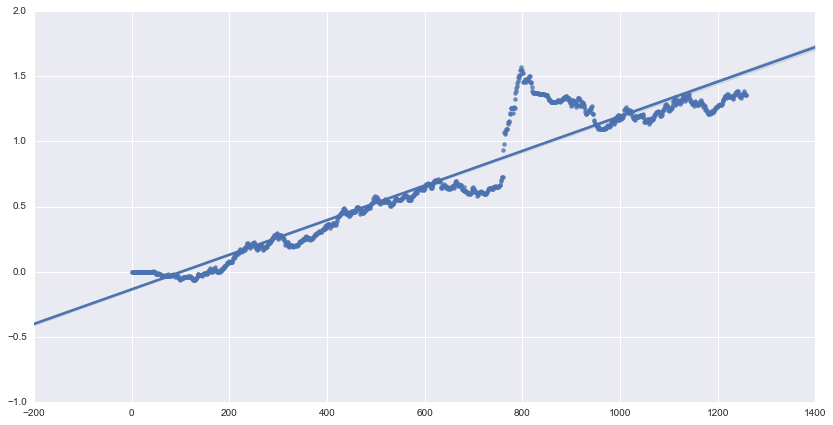

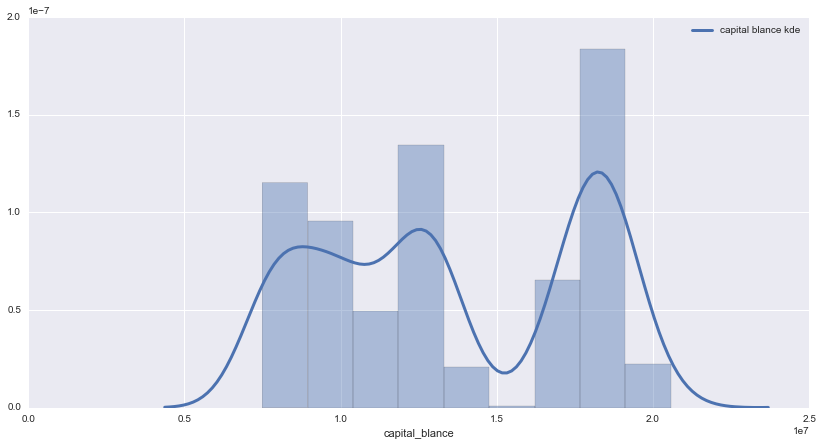

In [13]:
from abupy import AbuMetricsBase
metrics = AbuMetricsBase(*abu_result_tuple_hk)
metrics.fit_metrics()
metrics.plot_returns_cmp()

In [14]:
has_result = abu_result_tuple_hk.orders_pd[abu_result_tuple_hk.orders_pd.result != 0]
has_result.sort_values('profit_cg').filter(['buy_price', 'symbol', 
                                            'sell_type_extra', 'sell_date', 
                                            'sell_price', 'profit_cg'])[::-1][:10]

,buy_price,symbol,sell_type_extra,sell_date,sell_price,profit_cg
2015-03-26,1.1800,hk01003,AbuFactorAtrNStop:stop_win=3.0,20150515,5.7800,3.898305
2016-04-01,1.8680,hk01315,AbuFactorAtrNStop:stop_win=3.0,20160503,9.0750,3.858137
2015-03-30,1.1950,hk01003,AbuFactorAtrNStop:stop_win=3.0,20150515,5.7800,3.836820
2015-04-10,0.1030,hk00273,AbuFactorAtrNStop:stop_win=3.0,20150508,0.4450,3.320388
2014-03-12,0.1085,hk00982,AbuFactorAtrNStop:stop_win=3.0,20140519,0.4575,3.216590
2014-03-12,0.1085,hk00982,AbuFactorAtrNStop:stop_win=3.0,20140519,0.4575,3.216590
2016-05-11,0.3220,hk08261,AbuFactorAtrNStop:stop_win=3.0,20160517,1.2750,2.959627
2016-05-11,0.3220,hk08261,AbuFactorAtrNStop:stop_win=3.0,20160517,1.2750,2.959627
2013-07-18,0.0425,hk08132,AbuFactorAtrNStop:stop_win=3.0,20130729,0.1640,2.858824
2015-04-14,0.1185,hk00273,AbuFactorAtrNStop:stop_win=3.0,20150508,0.4450,2.755274
